In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_titles_df = pd.read_csv('netflix_titles.csv')
netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
netflix_titles_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

## Xử lý các giá trị NULL

In [5]:
netflix_titles_df.isnull().values.any()

True

In [6]:
netflix_titles_df.isnull().sum().sum()

3036

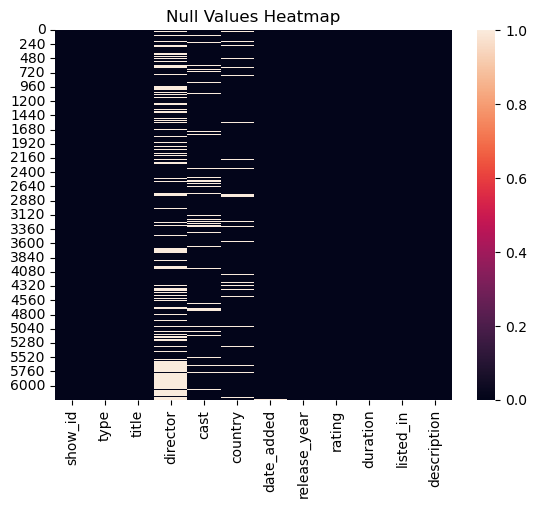

In [7]:
sns.heatmap(netflix_titles_df.isnull(), cbar=True)
plt.title('Null Values Heatmap')
plt.show()

Kết quả cho thấy các giá trị NULL tập hợp nhiều nhất ở các cột director, cast, country

In [8]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('No Country', inplace=True)
netflix_titles_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [10]:
netflix_titles_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Tách các thể loại phim

In [11]:
##Voi the loai movie
netflix_movie_df = netflix_titles_df[netflix_titles_df['type']=='Movie']
netflix_movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


In [12]:
##Voi the loai TV show
netflix_TV_df = netflix_titles_df[netflix_titles_df['type']=='TV Show']
netflix_TV_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",No Country,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


## Xu ly du lieu

In [13]:
netflix_movie_df['duration'] = netflix_movie_df['duration'].astype(str).str.replace('min', "").astype(int)
netflix_movie_df

C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\1214627415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie_df['duration'] = netflix_movie_df['duration'].astype(str).str.replace('min', "").astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


In [14]:
netflix_TV_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_TV_df.replace({'seasons':{'1 Season': '1 Seasons'}}, inplace=True)
netflix_TV_df.seasons = netflix_TV_df.seasons.astype(str).str.replace('Seasons', "").astype(int)
netflix_TV_df

C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\3781767856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_TV_df.rename(columns={'duration':'seasons'}, inplace=True)
C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\3781767856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_TV_df.replace({'seasons':{'1 Season': '1 Seasons'}}, inplace=True)
C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\3781767856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",No Country,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2,"International TV Shows, Reality TV",A new set of six men and women start their liv...


## Truc quan hoa

In [15]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6214 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   director      6214 non-null   object
 4   cast          6214 non-null   object
 5   country       6214 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6214 non-null   int64 
 8   rating        6214 non-null   object
 9   duration      6214 non-null   object
 10  listed_in     6214 non-null   object
 11  description   6214 non-null   object
dtypes: int64(2), object(10)
memory usage: 631.1+ KB


In [16]:
netflix_titles_df.type.astype(str)
netflix_titles_df.type.dtypes

dtype('O')

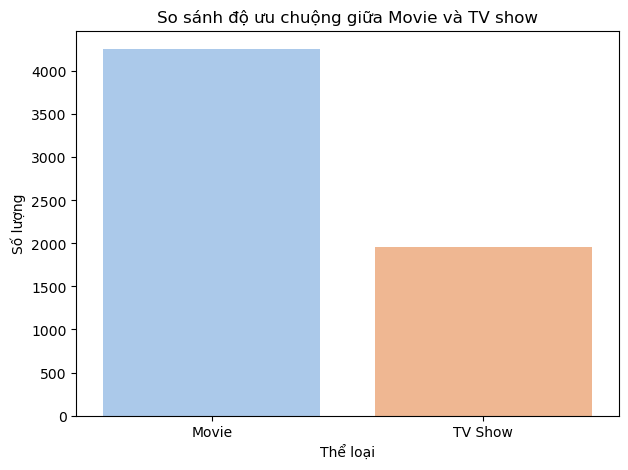

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(data=netflix_titles_df, x='type', palette='pastel')
plt.title('So sánh độ ưu chuộng giữa Movie và TV show')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng');

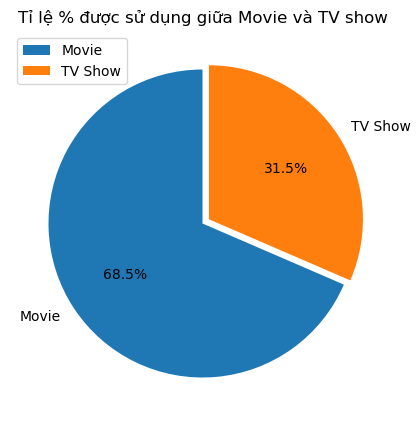

In [18]:
plt.figure(figsize=(7,5))
plt.pie(netflix_titles_df['type'].value_counts(), explode=(0, 0.05), startangle=90, autopct='%1.1f%%', 
        labels = netflix_titles_df.type.value_counts().index)
plt.title('Tỉ lệ % được sử dụng giữa Movie và TV show')
plt.legend();

In [19]:
netflix_titles_df.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'UR', 'NC-17'], dtype=object)

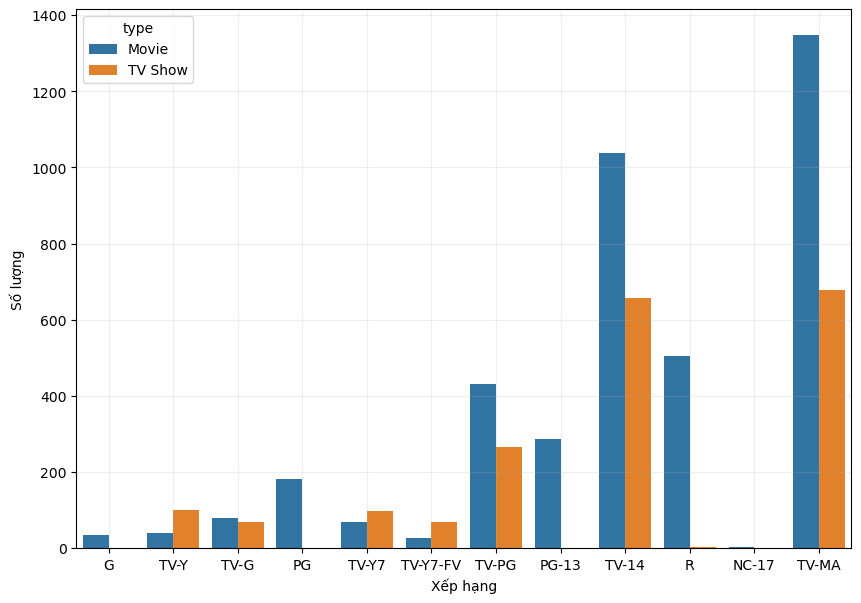

In [20]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(10,7))
sns.countplot(data=netflix_titles_df, x='rating', order=order, hue=netflix_titles_df['type'])
plt.grid(alpha=0.2)
plt.xlabel('Xếp hạng')
plt.ylabel('Số lượng');


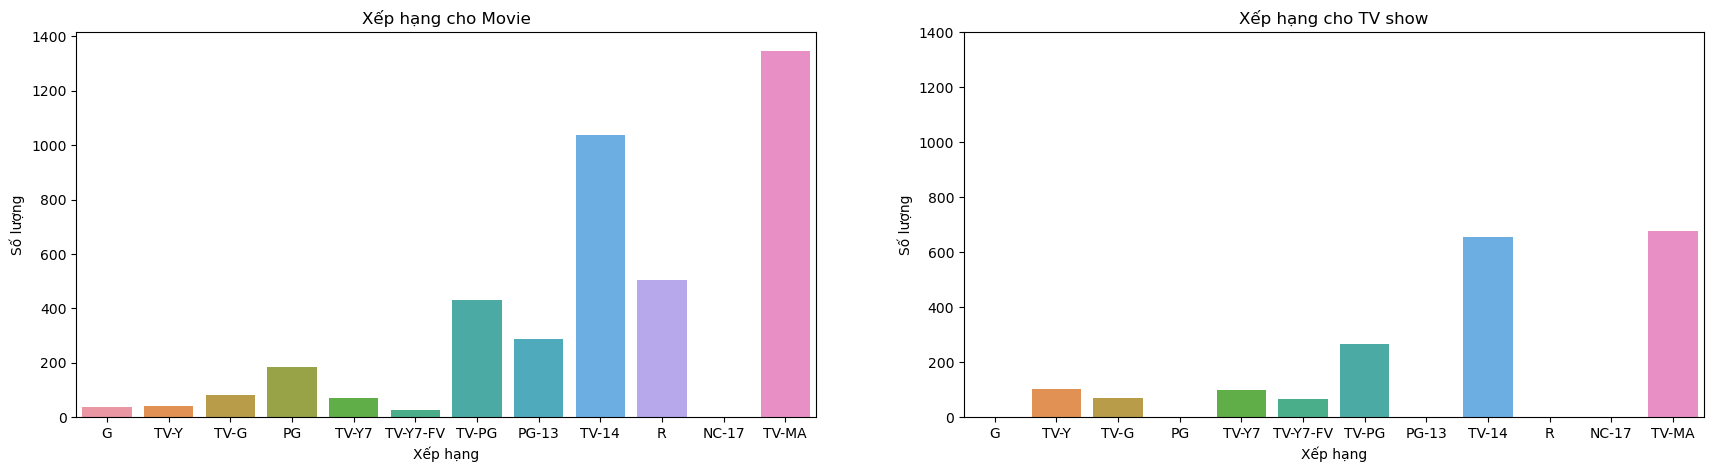

In [21]:
fig, ax = plt.subplots(1,2, figsize=(21, 5))
g1 = sns.countplot(data=netflix_movie_df, x='rating', ax=ax[0], order=order)
g1.set_title('Xếp hạng cho Movie')
g1.set_xlabel('Xếp hạng')
g1.set_ylabel('Số lượng')
g2 = sns.countplot(data=netflix_TV_df, x='rating', ax=ax[1], order=order)
g2.set(yticks=np.arange(0,1600,200))
g2.set_title('Xếp hạng cho TV show')
g2.set_xlabel('Xếp hạng')
g2.set_ylabel('Số lượng');

In [22]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6214 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   director      6214 non-null   object
 4   cast          6214 non-null   object
 5   country       6214 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6214 non-null   int64 
 8   rating        6214 non-null   object
 9   duration      6214 non-null   object
 10  listed_in     6214 non-null   object
 11  description   6214 non-null   object
dtypes: int64(2), object(10)
memory usage: 631.1+ KB


In [23]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movie_df['year_added'] = pd.DatetimeIndex(netflix_movie_df['date_added']).year
netflix_TV_df['year_added'] = pd.DatetimeIndex(netflix_TV_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movie_df['month_added'] = pd.DatetimeIndex(netflix_movie_df['date_added']).month
netflix_TV_df['month_added'] = pd.DatetimeIndex(netflix_TV_df['date_added']).month

C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\19280127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie_df['year_added'] = pd.DatetimeIndex(netflix_movie_df['date_added']).year
C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\19280127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_TV_df['year_added'] = pd.DatetimeIndex(netflix_TV_df['date_added']).year
C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\19280127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

## Đối với ngày tháng năm

In [24]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added': 'year'})
print(netflix_year)

    year  count
0   2019   2349
1   2018   1781
2   2017   1297
3   2016    453
4   2020    184
5   2015     88
6   2014     25
7   2011     13
8   2013     12
9   2012      7
10  2009      2
11  2008      2
12  2010      1


In [25]:
netflix_year_movie = netflix_movie_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added':'year'})
netflix_year_TV = netflix_TV_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added':'year'})
print('{}\n\n\n{}'.format(netflix_year_movie, netflix_year_TV))

    year  count
0   2019   1546
1   2018   1290
2   2017    910
3   2016    262
4   2020    147
5   2015     56
6   2014     19
7   2011     13
8   2013      6
9   2012      4
10  2009      2
11  2010      1
12  2008      1


   year  count
0  2019    803
1  2018    491
2  2017    387
3  2016    191
4  2020     37
5  2015     32
6  2013      6
7  2014      6
8  2012      3
9  2008      1


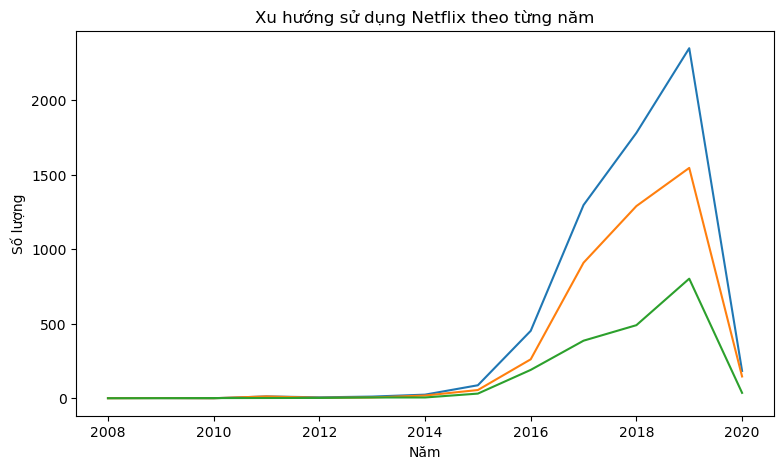

In [26]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=netflix_year_movie, x='year', y='count')
sns.lineplot(data=netflix_year_TV, x='year', y='count')
plt.title('Xu hướng sử dụng Netflix theo từng năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng');

Từ dữ liệu bảng cho thấy là xu hướng sử dụng Netflix trên toàn cầu tăng rất mạnh theo từng năm. Đặc biệt là từ năm 2015 nó càng dần trở nên phổ biến và không có dấu hiệu dừng lại. Lý do biểu đồ có xu hướng đi xuống ở năm 2020 có thể là do có nhiều ứng dụng khác cạnh tranh hoặc thời điểm thống kê dataset là đang ở đầu hoặc giữa năm 2020.

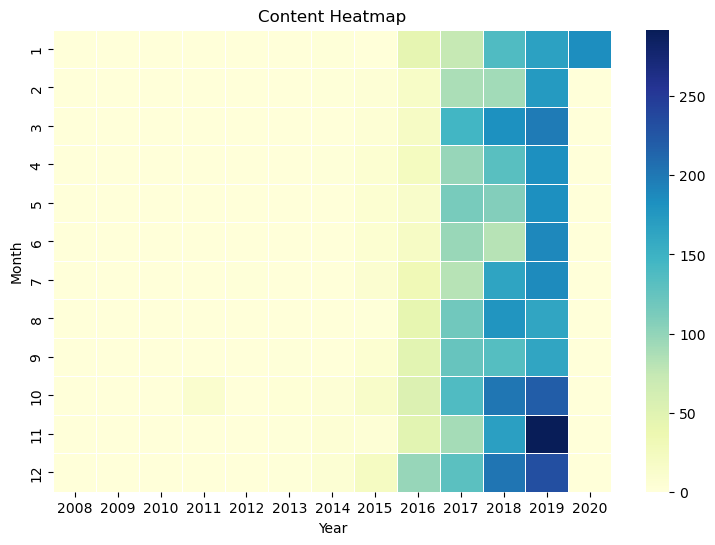

In [27]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(9, 6))
sns.heatmap(month_year_df, cmap='YlGnBu', lw=0.5)
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year");

## Thời lượng xem Netflix

C:\Users\vuan3\AppData\Local\Temp\ipykernel_6068\3417904971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(netflix_movie_df.duration, ax=ax[0])


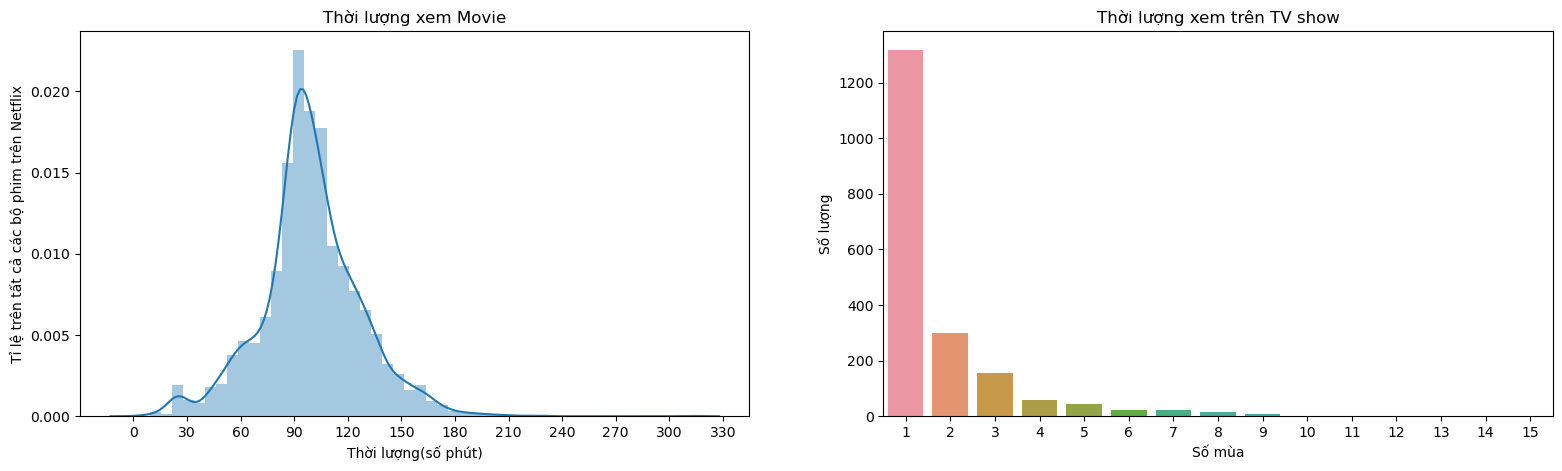

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))
g1 = sns.distplot(netflix_movie_df.duration, ax=ax[0])
g1.set_xticks(np.arange(0,360,30))
g1.set_title('Thời lượng xem Movie')
g1.set_xlabel('Thời lượng(số phút)')
g1.set_ylabel('Tỉ lệ trên tất cả các bộ phim trên Netflix')
g2 = sns.countplot(data=netflix_TV_df, x='seasons', ax=ax[1])
g2.set_xlabel('Số mùa')
g2.set_ylabel('Số lượng')
g2.set_title('Thời lượng xem trên TV show');

In [29]:
netflix_titles_df['country'].unique()

array(['United States, India, South Korea, China', 'United Kingdom',
       'United States', 'Spain', 'Bulgaria, United States, Spain, Canada',
       'Chile', 'United States, United Kingdom, Denmark, Sweden',
       'No Country',
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium', 'United States, Uruguay', 'United States,',
       'Thailand', 'China, Canada, United States',
       'Belgium, United Kingdom, United States', 'Belgium, France',
       'India', 'France', 'United States, Canada', 'Pakistan', 'Canada',
       'United Kingdom, France', 'United States, United Kingdom',
       'South Korea', 'Denmark, United States',
       'United Kingdom, United States', 'Turkey, United States', 'Brazil',
       'Denmark, France, Italy, Belgium, Netherlands', 'Indonesia',
       'China', 'Ireland, United Kingdom', 'Turkey', 'Hong Kong',
       'France, Morocco', 'Hong Kong, China', 'Mexico',
       'United States, Mexico', 'Vietnam', 'France, Canada',
     

## 20 nước dùng Netflix nhiều nhất

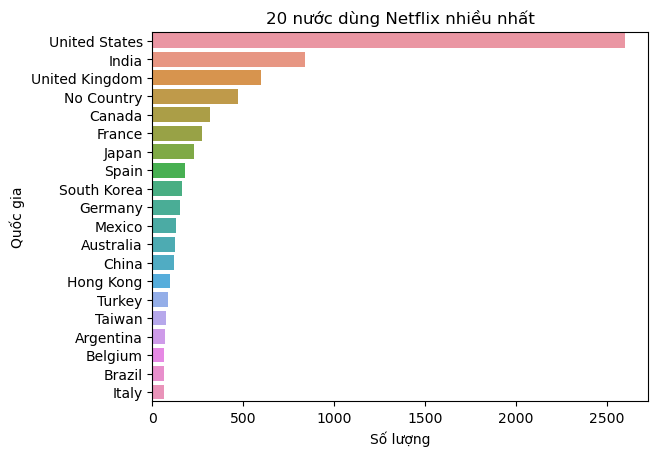

In [30]:
tach_dau = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

sns.countplot(y=tach_dau, order=tach_dau.value_counts().index[:20])
plt.title('20 nước dùng Netflix nhiều nhất')
plt.xlabel('Số lượng')
plt.ylabel('Quốc gia');

## Thể loại phổ biến

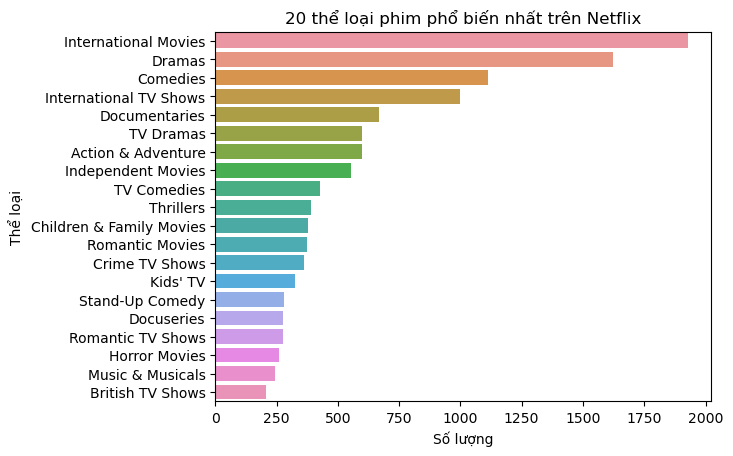

In [31]:
cac_the_loai = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=cac_the_loai, order=cac_the_loai.value_counts().index[:20])
plt.title('20 thể loại phim phổ biến nhất trên Netflix')
plt.xlabel('Số lượng')
plt.ylabel('Thể loại');


## 10 đạo diễn có phim phổ biến nhất


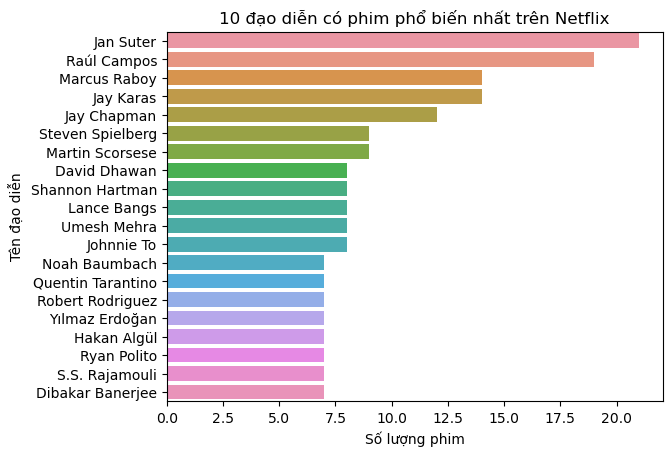

In [32]:
cac_dao_dien = netflix_titles_df[netflix_titles_df['director'] != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y=cac_dao_dien, order=cac_dao_dien.value_counts().index[:20])
plt.xlabel('Số lượng phim')
plt.ylabel('Tên đạo diễn')
plt.title('10 đạo diễn có phim phổ biến nhất trên Netflix');

## 10 diễn viên hàng đầu trên Netflix

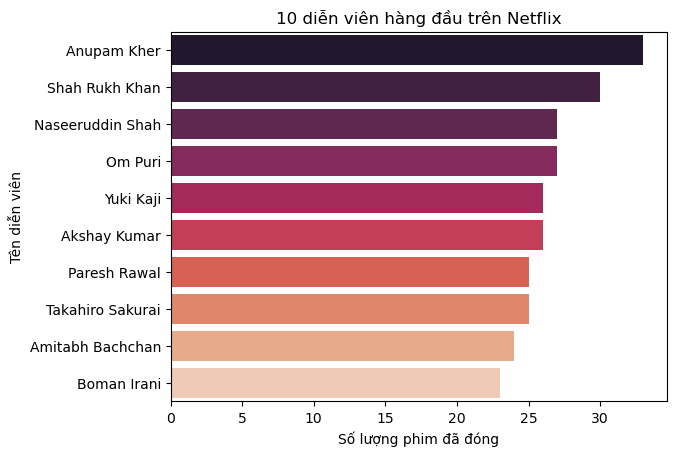

In [33]:
cac_dien_vien = netflix_titles_df[netflix_titles_df['cast'] != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=1)
sns.countplot(y=cac_dien_vien, order=cac_dien_vien.value_counts().index[:10], palette='rocket')
plt.xlabel('Số lượng phim đã đóng')
plt.ylabel('Tên diễn viên')
plt.title('10 diễn viên hàng đầu trên Netflix');

## So sánh giữa phim quốc tế và chương trình truyền hình quốc tế

In [38]:
international_movie = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov = international_movie['year_added'].value_counts().to_frame().reset_index().rename(columns={'year_added': 'year'})
#intmov
international_TV = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intTV = international_TV['year_added'].value_counts().to_frame().reset_index().rename(columns = {'year_added': 'year'})

print('{}\n\n\n{}'.format(intmov, intTV));

   year  count
0  2018    702
1  2019    651
2  2017    455
3  2016     87
4  2020     18
5  2015     10
6  2014      2
7  2009      1
8  2011      1


   year  count
0  2019    413
1  2018    246
2  2017    223
3  2016     92
4  2020     19
5  2015      5
6  2013      1


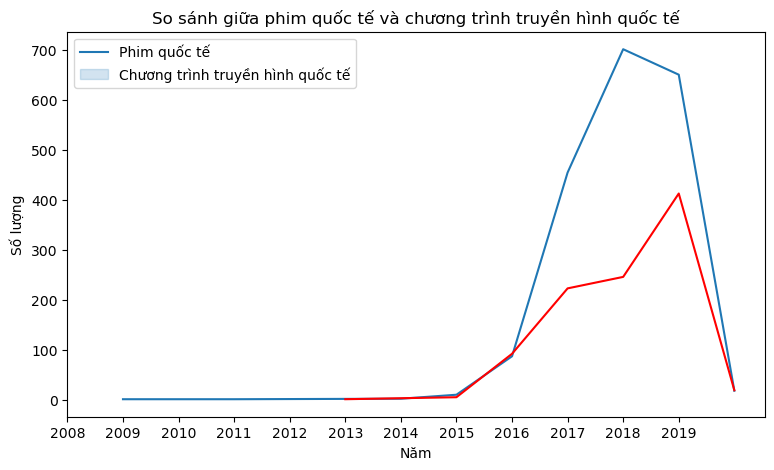

In [49]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.lineplot(data=intmov, x='year', y='count')
sns.lineplot(data=intTV, x='year', y='count', color='red')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.legend(['Phim quốc tế', 'Chương trình truyền hình quốc tế'])
plt.title('So sánh giữa phim quốc tế và chương trình truyền hình quốc tế')
plt.xlabel('Năm')
plt.ylabel('Số lượng');

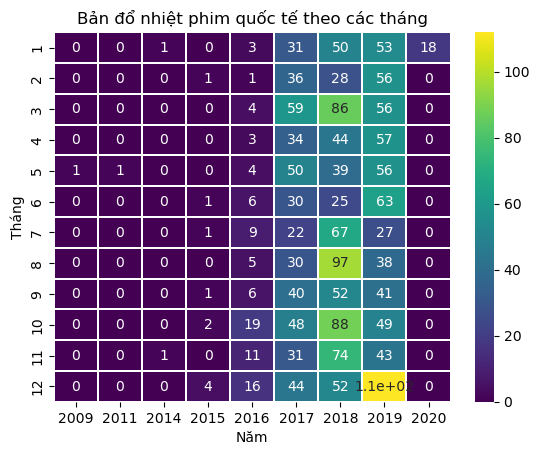

In [65]:
int_mov = international_movie.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
#int_mov
sns.heatmap(int_mov, cmap='viridis', lw=0.01, annot=True)
plt.title('Bản đổ nhiệt phim quốc tế theo các tháng')
plt.xlabel('Năm')
plt.ylabel('Tháng');

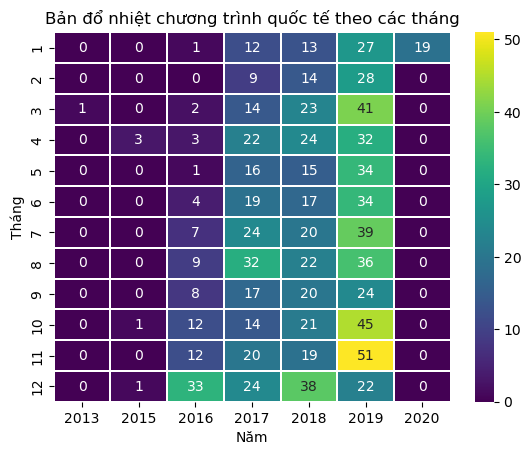

In [69]:
int_TV = international_TV.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
#int_TV
sns.heatmap(data=int_TV, cmap='viridis', lw=0.01, annot=True)
plt.title('Bản đổ nhiệt chương trình quốc tế theo các tháng')
plt.xlabel('Năm')
plt.ylabel('Tháng');